---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

Estudiantes:

- Arelys Malachany Ugarte
- Carné: **B74407**
- Kristel Barahona Sanchez
- Carné: **B80917**
- Dunia Ariana Méndez García
- Carné: **B54341**


# `P5` - *Procesos M/M/s*

> El caso especial de los procesos aleatorios donde existen "estados" y "transiciones" entre estos estados, las cadenas de Markov modelan las probabilidades de transición y el tiempo de permanencia entre cada estado. En particular, la teoría de colas describe la evolución del número de elementos en la fila, dado un flujo de entrada y un flujo de salida.



---
##  Asignaciones

Es menester tomar una decisión con respecto al número de "servidores" necesarios para cierto proceso de vacunación, de forma tal que el sistema no exceda 50 personas en fila durante el 95% del tiempo de servicio. 

En un estudio de afluencia y del tiempo de servicio se asumen y determinan los siguientes parámetros:

- La tasa de llegada $\lambda$ es constante durante ocho horas de funcionamiento y tiene un valor de $\lambda = 4$ personas por minuto.

- La tasa de servicio $\nu$ de cada "servidor" (es decir, personal de salud tomando datos y vacunando) es constante durante ocho horas de funcionamiento y tiene un valor de $\nu = 0.25$ personas por minuto.

Entonces,

- (40%) Hacer la determinación teórica del número $s$ de servidores necesarios para cumplir el requisito.
- (60%) Modificar el código provisto para simular y corroborar el resultado anterior y crear al menos dos gráficas que muestren esta simulación.


### 1. Determinación teórica del número $s$ de servidores necesarios para cumplir el requisito.

La tasa de llegada es $\lambda = 4$ $\frac{Personas}{minuto}$

La tasa de servicio de cada servidor es $\nu = 0.25$ $\frac{Personas}{minuto}$

La cantidad de clientes por estados es $i\left(estados\right)$

Se requiere determinar el numero de "servidores" necesarios para que el sistema no exceda 100 personas en fila durante el 95% del tiempo de servicio.

Esto se puede expresar como (Asumiendo que los servidores estan ocupados en todo momento)

>$P(51 \text{ o } \text{más } \text{clientes } \text{en } \text{el } \text{sistema}) \leq 0.05 \Leftrightarrow \sum_{i=51}^{\infty} \theta_i =1-\sum_{i=0}^{51} \leq 0.05$   (1)

Donde $\theta_i$ corresponde al vector de probabilidad de estado estable para cada esatdo i.

Ahora, como se trata de un sistema M/M/S se sabe que:

>$\theta_i = \frac{s^s \varphi^i}{s!} \cdot \theta_0$, con $i\geq s$ servidores ocupados en todo momento.

>$\theta_0 = \left[\sum_{k=0}^{s-1} \frac{\left(s \varphi \right)^2}{k!} + \frac{\left(s \varphi \right)^2}{s!\left(1-\varphi \right)} \right]^{-1}$

>Y: $\varphi=\frac{\lambda}{s\nu}$

Para garantizar que el sistema alcanza un estado estacionario se debe cumplir que:

> $\varphi < 1  \Leftrightarrow \frac{\lambda}{s\nu} < 1 \Leftrightarrow \frac{4}{0.25 s} < 1 \Leftrightarrow 16 < s $

Por lo tanto, se sabe que en primera instancia que la cantidad de servidores debe ser mayor que 16.

Ahora sustituyendo en (1):
>$1-\sum_{i-0}^{50} \frac{s^s \varphi^i}{s!} \cdot \left[\sum_{k=0}^{s-1} \frac{\left(s \varphi \right)^2}{k!} + \frac{\left(s \varphi \right)^2}{s!\left(1-\varphi \right)} \right]^{-1} \leq 0.05 \Leftrightarrow 1-\sum_{i-0}^{50} \frac{s^s \left(\frac{\lambda}{s\nu}\right)^i}{s!} \cdot \left[\sum_{k=0}^{s-1} \frac{\left(s \left(\frac{\lambda}{s\nu}\right) \right)^2}{k!} + \frac{\left(s \left(\frac{\lambda}{s\nu}\right) \right)^2}{s!\left(1-\left(\frac{\lambda}{s\nu}\right) \right)} \right]^{-1} \leq 0.05$

Utilizando Wolfram Alpha para resolver lo anterior:

>$ s \geq 16.95$

Finalmente se deduce que con un mínimo de 17 servidores el 95% del tiempo habrá 50 o menos personas en fila.

### 2. Simulación de las gráficas solicitadas.

Se utiliza el código dado; en el cual se realizan cambios de acuerdo a la información suministrada para este caso.

Parámetro lambda = 4.0
Parámetro nu = 0.25
Número de servidores(s) =  17
Tiempo con más de 50 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 4.44 horas.


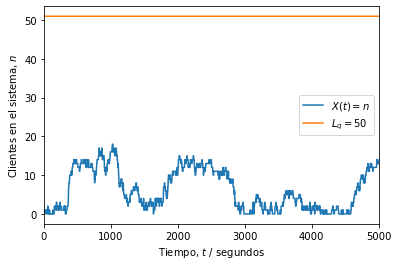

In [1]:
# Gráfica 1
# Empleando 16 servidores

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Número de clientes
N = 1000 # Se asigna el número de 3000 clientes

# Número de servidores
s = 17

# Parámetro de llegada (clientes/segundos)
lam = 4/60

# Parámetro de servicio (servicios/segundos)
nu = 0.25/60

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/(s*nu))

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 52

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
        exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print("Número de servidores(s) = ", str(s))
print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-2)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 5000))
plt.show()

### Resultados Gráfica 1

Respecto a la gráfica obtenida en la simulación empleando un total de 17 servidores donde cada uno atiende a 0.25 personas por minuto, en un tiempo alrededor de 4 horas con 44 minutos, con un número de 1000 clientes atendidos en total, la fila nunca llega a exceder las 50 personas durante el tiempo de servicio y se mantuvo un 0% de solicitudes en fila, lo cual indica que se cumple la especificación y no se acumularán 50 personas en la fila para el proceso de vacunación. 

Parámetro lambda = 4.0
Parámetro nu = 0.25
Tiempo con más de 50 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 4.49 horas.


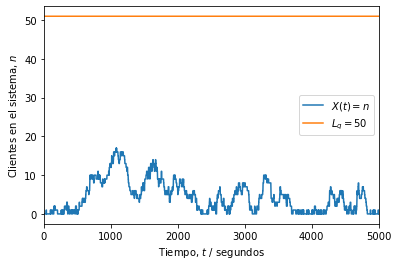

In [3]:
# Gráfica 2
# Empleando 20 servidores

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Número de clientes
N = 1000

# Número de servidores
s = 20

# Parámetro de llegada (clientes/segundos)
lam = 4/60

# Parámetro de servicio (servicios/segundos)
nu = 0.25/60

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/(s*nu))

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 52

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
        exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-2)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 5000))
plt.show()

### Resultados Gráfica 2


Acá se observa que la linea azul y la naranja son independientes, por tanto, no hay acumulación de personas, y se puede decir que el trabajo es eficiente y correcto ya que se atienden las 50 personas en la fila sin excederse y asi se obtiene un 0% de solicitudes en fila. 

Parámetro lambda = 4.0
Parámetro nu = 0.25
Tiempo con más de 50 solicitudes en fila:
	 64.61%
	 No cumple con la especificación.
Simulación es equivalente a 5.45 horas.


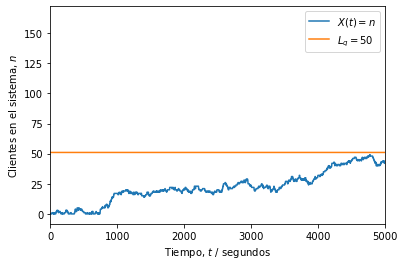

In [1]:
# Gráfica 3
# Empleando 12 servidores

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Número de clientes
N = 1000

# Número de servidores
s = 12

# Parámetro de llegada (clientes/segundos)
lam = 4/60

# Parámetro de servicio (servicios/segundos)
nu = 0.25/60

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/(s*nu))

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 52

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
        exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-2)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 5000))
plt.show()

### Resultados Gráfica 3


En este caso, se observa como las gráficas azul y naranja tienen una aproximación entre ellas, sin embargo, la azul no la atraviesa, por lo que se concluye que no hay excedentes de personas ni solicitudes en fila, si se realiza una comparación respecto a la primera gráfica, en la cual se tenían más srvidores, se puede observar que en la primera estaba lejos de línea naranja por lo que no se acumulan las personas en la fila, en cambio en la última se está muy al limite. 

## Conclusiones

- Se deduce que a menor cantidad de servidores no se cumple la especificación, dado que al tener 1000 clientes en el proceso de vacunación puede darse que se acumulen más de 50 personas en la fila. Por lo tanto, a mayor cantidad de servidores se puede dar el proceso de mejor manera y evitar que se acumulen personas en la fila y con ello dure menor tiempo el proceso.